<a href="https://colab.research.google.com/github/Srinivasyadav96/Loan-Application-Data-Analysis-Dashboard/blob/main/Python_Financial_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
data = pd.read_excel("/content/financial_loan.xlsx")
data.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [2]:
data.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [3]:
data.shape

(38576, 24)

In [4]:
a = data["issue_date"].isnull().sum()
print(a)

0


In [5]:
data.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


In [6]:
data.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [8]:
data["issue_date"] = pd.to_datetime(data["issue_date"],errors = "coerce")
data["last_credit_pull_date"] = pd.to_datetime(data["last_credit_pull_date"],format="mixed")
data["last_payment_date"] = pd.to_datetime(data["last_payment_date"],errors = "coerce")
data["next_payment_date"] = pd.to_datetime(data["next_payment_date"],format = "mixed")

Total Loan Applications


In [9]:
Total_Loan_Applications = data["id"].count()
print("Total Loan Applications",Total_Loan_Applications)

Total Loan Applications 38576


Month_to_Date Total Loan Applications

In [10]:
latest_issue_date = data['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = data[
    (data["issue_date"].dt.year == latest_year) &
    (data["issue_date"].dt.month == latest_month)
    ]
mtd_loan_applications = mtd_data["id"].count()
print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")


#print("Counts by month:\n", data["issue_date"].dt.to_period("M").value_counts())

MTD Loan Applications (for December 2021):4314


Total Funded Amount

In [11]:
total_funded_amount = data["loan_amount"].sum()
print("Total Funded Amount:",total_funded_amount)

Total Funded Amount: 435757075


In [12]:
total_funded_amount_millions = total_funded_amount/1000000
print("Total Funded Amount : ${:.2f}M".format(total_funded_amount_millions))

Total Funded Amount : $435.76M


MTD Total Funded Amount

In [13]:
latest_issue_date = data["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = data[(data["issue_date"].dt.year==latest_year) & (data["issue_date"].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data["loan_amount"].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000
print("MTD Total Fund Amount : ${:.2f}M".format(mtd_total_funded_amount_millions))


MTD Total Fund Amount : $53.98M


Total Amount Received

In [14]:
total_amount_recieved = data["total_payment"].sum()
total_amount_recieved_millions = total_amount_recieved/1000000
print("Total Amount Recieved in millions : ${:.2f}M ".format(total_amount_recieved_millions))

Total Amount Recieved in millions : $473.07M 


MTD  Total Amount Recieved

In [15]:
latest_issue_date = data["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = data[(data["issue_date"].dt.year == latest_year) & (data["issue_date"].dt.month == latest_month)]

#print(mtd_data["issue_date"].shape[0])

mtd_total_recieved_amount = mtd_data["total_payment"].sum()
mtd_total_recieved_amount_millions = mtd_total_recieved_amount/1000000
print("total_recieved_amount in millions : ${:.2f}M".format(mtd_total_recieved_amount_millions))

total_recieved_amount in millions : $58.07M


Average Interest Rate

In [16]:
average_interest_rate = data["int_rate"].mean()*100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


Average Dept To Income Ratio(DTI)

In [17]:
average_dti = data["dti"].mean()*100
print("Average DTI : {:.2f}%".format(average_dti))

Average DTI : 13.33%


Good Loan Matrics

In [18]:
good_loans = data[data["loan_status"].isin(["Fully Paid","Current"])]

total_loan_applications = data["id"].count()

good_loan_applications = good_loans["id"].count()
good_loan_funded_amount = good_loans["loan_amount"].sum()
good_loan_recieved_amount = good_loans["total_payment"].sum()

good_loan_funded_amount_millions = good_loan_funded_amount/1000000
good_loan_recieved_amount_millions = good_loan_recieved_amount/1000000

good_loan_percentage = (good_loan_applications/total_loan_applications)*100

print("Good Loan Applications:",good_loan_applications)
print("Good Loan Fumded Amount(in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Recieved (in ,illions): ${:.2f}M".format(good_loan_recieved_amount_millions))
print("Percentage Of Good Loan Applications:{:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Fumded Amount(in Millions): $370.22M
Good Loan Total Recieved (in ,illions): $435.79M
Percentage Of Good Loan Applications:86.18%


Bad Balance Matrics

In [19]:
bad_loans = data[data["loan_status"].isin(["Charged Off"])]

total_loan_applications = data["id"].count()

bad_loan_applications = bad_loans["id"].count()
bad_loan_funded_amount = bad_loans["loan_amount"].sum()
bad_loan_recieved_amount = bad_loans["total_payment"].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000
bad_loan_recieved_amount_millions = bad_loan_recieved_amount/1000000

bad_loan_percentage = (bad_loan_applications/total_loan_applications)*100

print("Bad Loan Applications:",bad_loan_applications)
print("Bad Loan Funded Amount(in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Recieved Amount(in Millions): ${:.2f}M".format(bad_loan_recieved_amount_millions))
print("Percentage o f Bad Loan Apllications : {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount(in Millions): $65.53M
Bad Loan Recieved Amount(in Millions): $37.28M
Percentage o f Bad Loan Apllications : 13.82%


Monthly Trend By Issue Date For Total Funded Amount

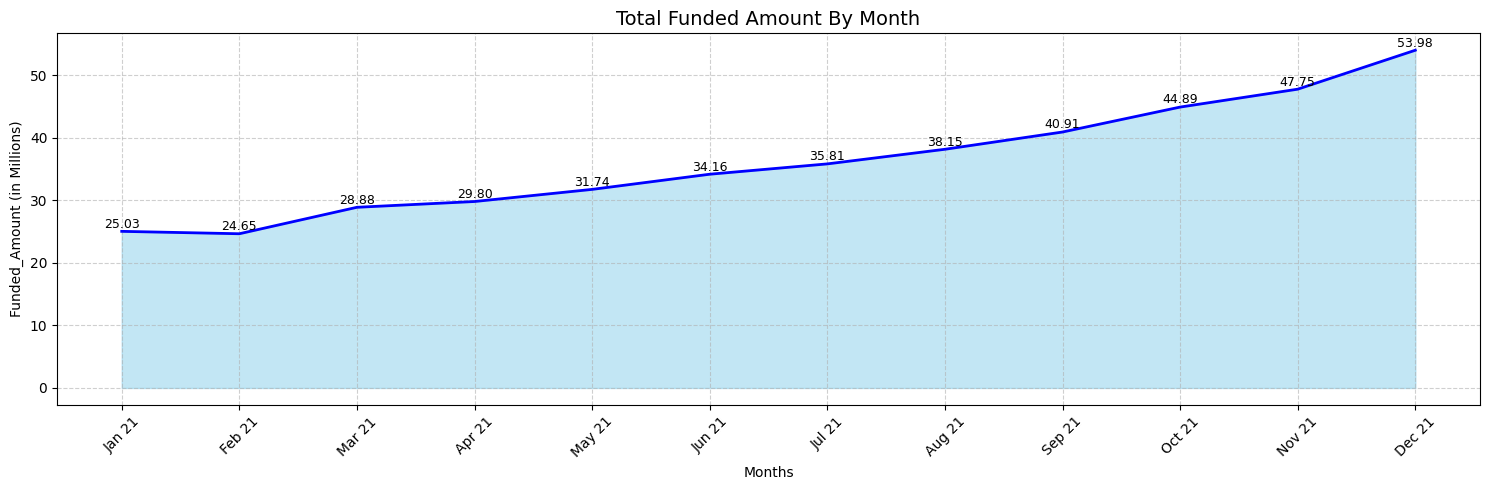

In [20]:
monthly_funded =(
    data.sort_values('issue_date')
    .assign(month_name = lambda x: x["issue_date"].dt.strftime("%b %y"))
    .groupby("month_name",sort=False)["loan_amount"]
    .sum()
    .div(1000000)
    .reset_index(name = "loan_amount_millions")
)


plt.figure(figsize=(15,5))
plt.fill_between(monthly_funded["month_name"],monthly_funded["loan_amount_millions"],color='skyblue',alpha=0.5)
plt.plot(monthly_funded["month_name"],monthly_funded["loan_amount_millions"],color ="blue", linewidth = 2)



for i,row in monthly_funded.iterrows():
  plt.text(i,row["loan_amount_millions"] + 0.1, f"{row["loan_amount_millions"]:.2f}",
  ha='center', va='bottom', fontsize=9 , rotation=0, color = "black")


plt.title("Total Funded Amount By Month", fontsize = 14)
plt.xlabel("Months")
plt.ylabel("Funded_Amount (in Millions)")
plt.xticks(ticks = range(len(monthly_funded)),labels = monthly_funded["month_name"],rotation=45)
plt.grid(True,linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

Monthly Trend By Issue Date  For Total Amount Recieved

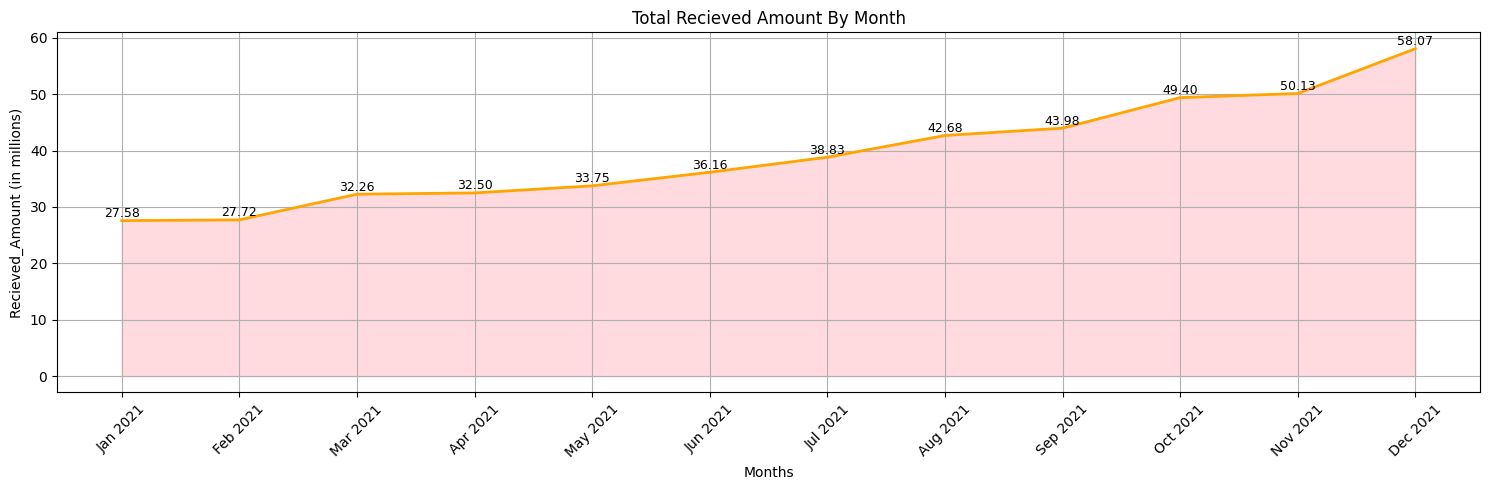

In [21]:
monthly_recieved = (
    data.sort_values("issue_date")
    .assign(month_name = lambda x : x["issue_date"].dt.strftime("%b %Y"))
    .groupby("month_name",sort = False)["total_payment"]
    .sum()
    .div(1000000)
    .reset_index(name = "recieved_amount_millions")
)


plt.figure(figsize = (15,5))
plt.fill_between(monthly_recieved["month_name"],monthly_recieved["recieved_amount_millions"],color = "lightpink" , alpha = 0.5)
plt.plot(monthly_recieved["month_name"],monthly_recieved["recieved_amount_millions"],color = "orange",linewidth = 2)


for i,row in monthly_recieved.iterrows():
  plt.text(i,row["recieved_amount_millions"] + 0.1, f"{row["recieved_amount_millions"]:.2f}",
           ha = "center", va = "bottom", fontsize = 9, rotation = 0 , color = "black")


plt.title("Total Recieved Amount By Month")
plt.xlabel("Months")
plt.ylabel("Recieved_Amount (in millions)")
plt.xticks(ticks = range(len(monthly_recieved)),label = monthly_recieved["month_name"],rotation = 45)
plt.grid()
plt.tight_layout()
plt.show()

Monthly Trends By Issue Date For Total Loan Applications

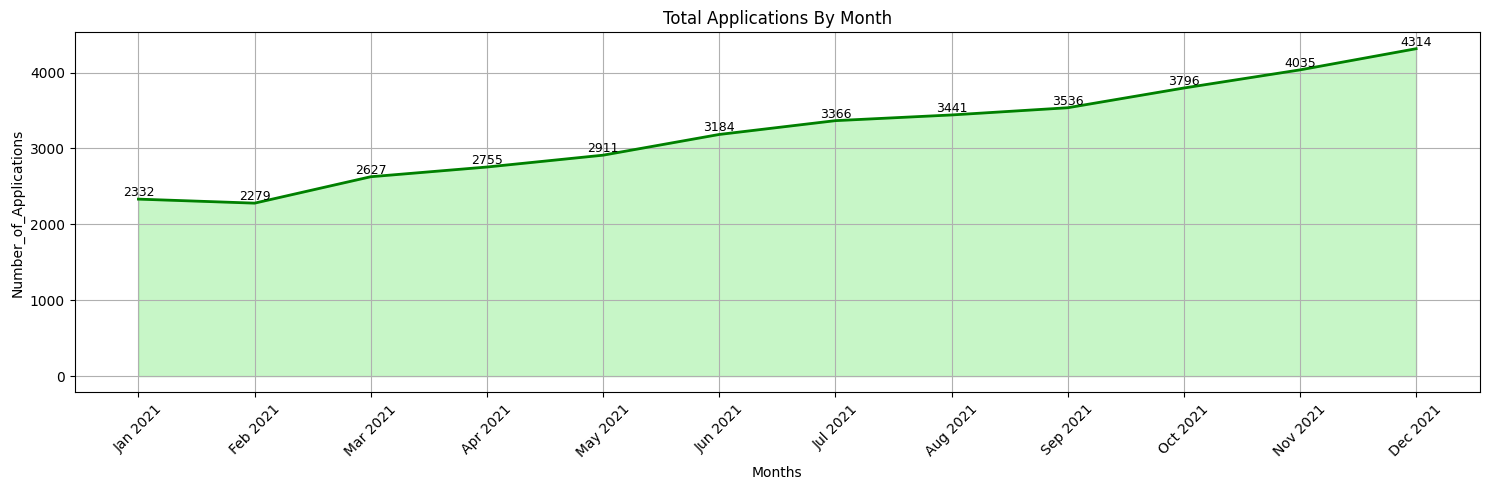

In [22]:
monthly_applications = (
    data.sort_values("issue_date")
    .assign(month_name = lambda x : x["issue_date"].dt.strftime("%b %Y"))
    .groupby("month_name",sort = False)["id"]
    .count()
    .reset_index(name = "total_monthly_applications")
)


plt.figure(figsize = (15,5))
plt.fill_between(monthly_applications["month_name"],monthly_applications["total_monthly_applications"],color = "lightgreen" , alpha = 0.5)
plt.plot(monthly_applications["month_name"],monthly_applications["total_monthly_applications"],color = "green",linewidth = 2)


for i,row in monthly_applications.iterrows():
  plt.text(i,row["total_monthly_applications"] + 0.1, f"{row["total_monthly_applications"]}",
           ha = "center", va = "bottom", fontsize = 9, rotation = 0 , color = "black")


plt.title("Total Applications By Month")
plt.xlabel("Months")
plt.ylabel("Number_of_Applications")
plt.xticks(ticks = range(len(monthly_applications)),label = monthly_applications["month_name"],rotation = 45)
plt.grid()
plt.tight_layout()
plt.show()

Reginal Analysis By State for Funded Amount

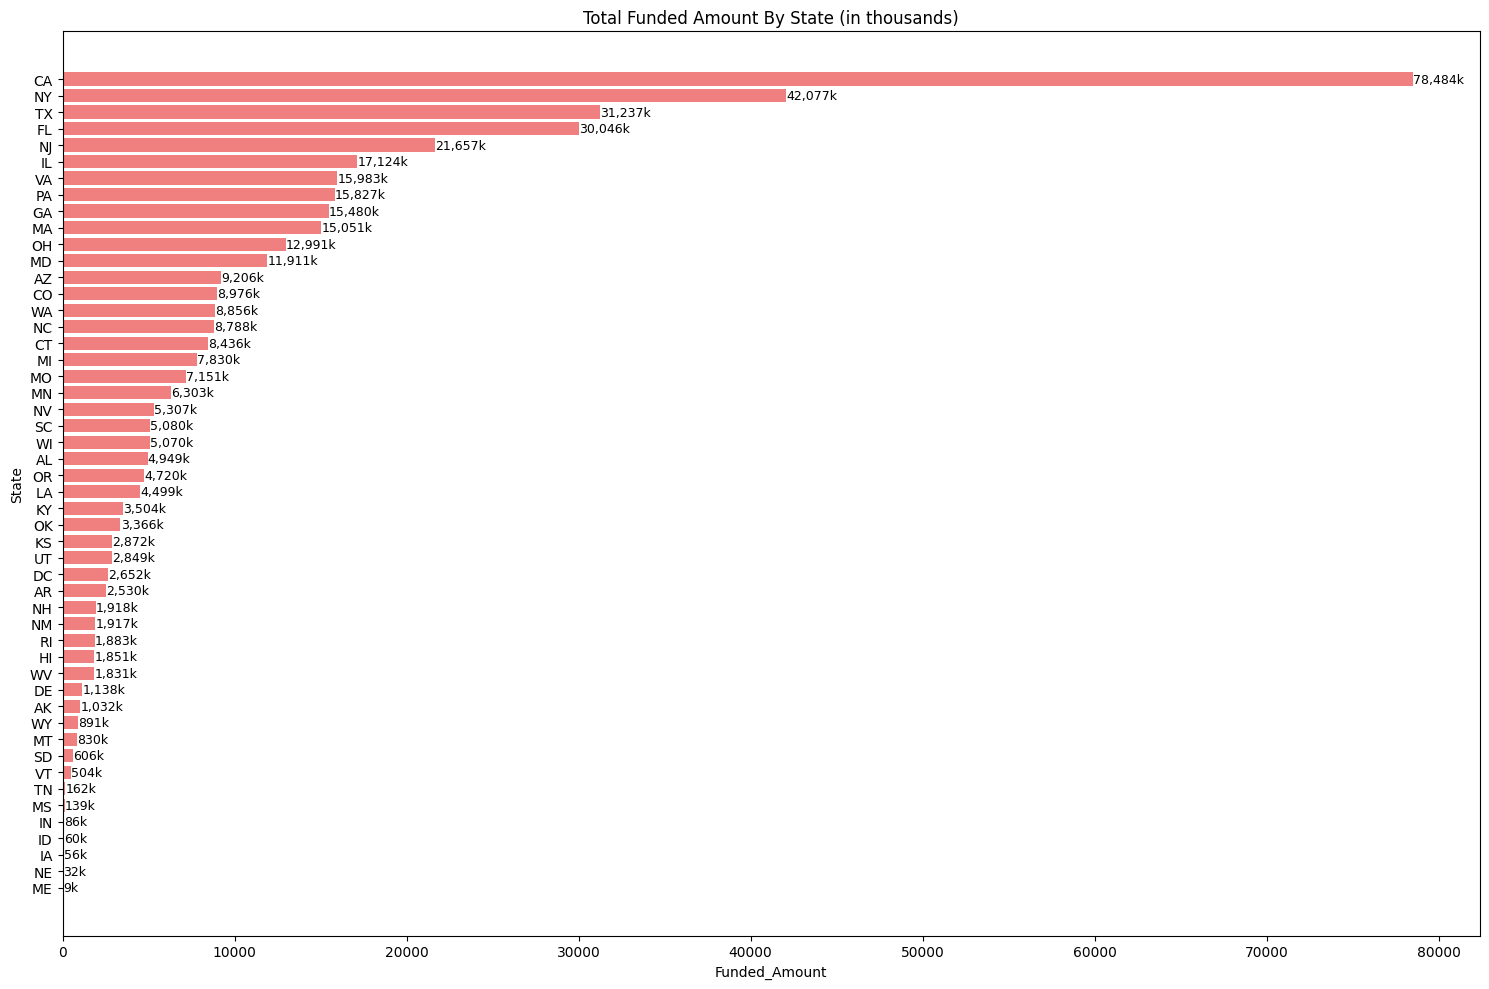

In [23]:
state_funding = data.groupby('address_state')["loan_amount"].sum().sort_values(ascending=True)
state_funding_thousands = state_funding/1000

plt.figure(figsize=(15,10))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color = "lightcoral")


for bar in bars:
  width  = bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height()/2, f"{width:,.0f}k", va = "center", fontsize = 9)

plt.title("Total Funded Amount By State (in thousands)")
plt.xlabel("Funded_Amount")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Reginal Analysis By State For Recieved Amount

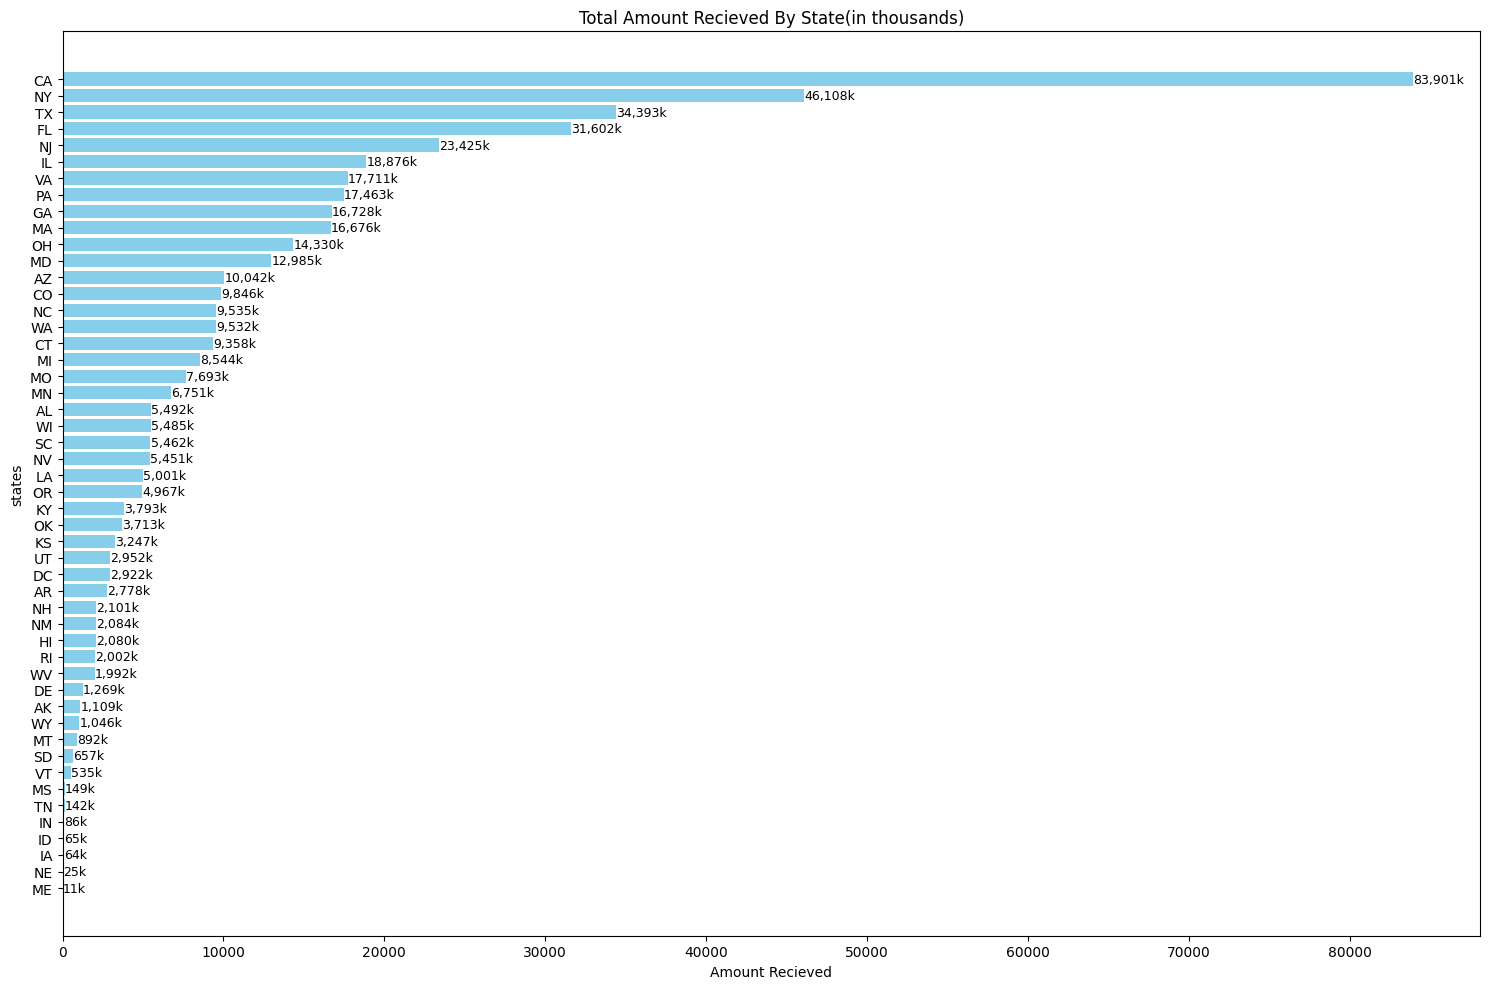

In [24]:
state_recieved = data.groupby("address_state")["total_payment"].sum().sort_values(ascending = True)
state_recieved_thousands = state_recieved/1000

plt.figure(figsize = (15,10))
bars =plt.barh(state_recieved_thousands.index, state_recieved_thousands.values,color = "skyblue")


for bar in bars:
  width=bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height()/2, f"{width:,.0f}k", va = "center", fontsize = 9)

plt.title("Total Amount Recieved By State(in thousands)")
plt.xlabel("Amount Recieved")
plt.ylabel("states")
plt.tight_layout()
plt.show()

Loan Term Analysis By Total Funded Amount

In [25]:
data["term"]

,term
0,60 months
1,36 months
2,36 months
3,60 months
4,36 months
...,...
38571,60 months
38572,60 months
38573,60 months
38574,60 months


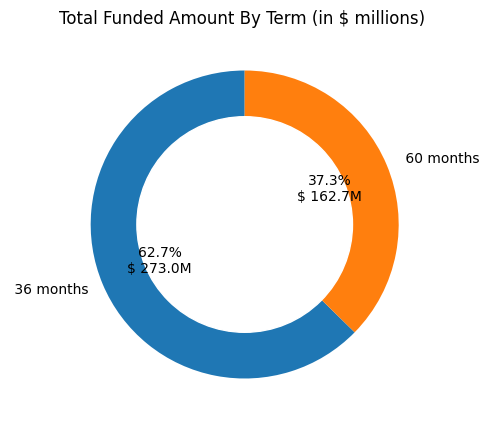

In [26]:
term_funding_millions = data.groupby("term")["loan_amount"].sum()/1000000

plt.figure(figsize = (5,5))
plt.pie(
    term_funding_millions,
    labels = term_funding_millions.index,
    autopct = lambda p: f"{p:.1f}%\n$ {p*sum(term_funding_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {'width': 0.4}
)


plt.gca().add_artist(plt.Circle((0,0), 0.70, color = 'white'))
plt.title("Total Funded Amount By Term (in $ millions) ")
plt.show()

Loan Term Analysis For Recieved Amount

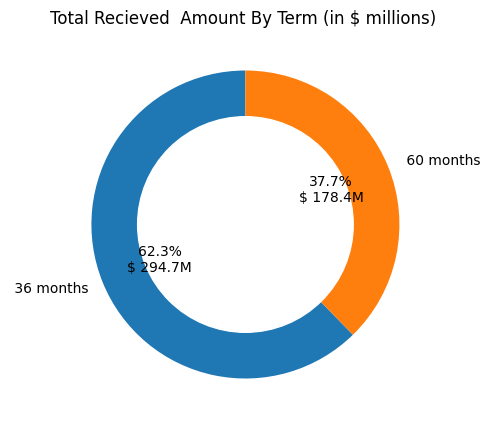

In [27]:
term_recieved_millions = data.groupby("term")["total_payment"].sum()/1000000

plt.figure(figsize = (5,5))
plt.pie(
    term_recieved_millions,
    labels = term_recieved_millions.index,
    autopct = lambda p: f"{p:.1f}%\n$ {p*sum(term_recieved_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {'width': 0.4}
)


plt.gca().add_artist(plt.Circle((0,0), 0.70, color = 'white'))
plt.title("Total Recieved  Amount By Term (in $ millions) ")
plt.show()

Total Number Of Applications by Loan Term Analysis

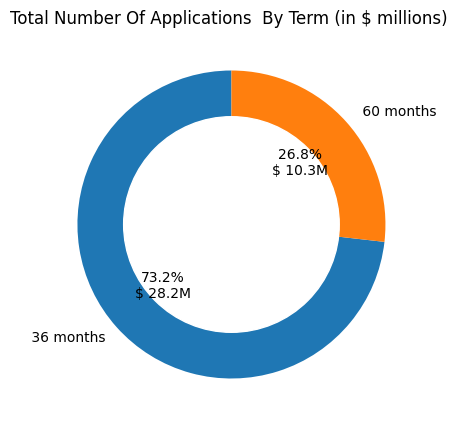

In [28]:
total_applications_by_term = data.groupby("term")["id"].count()/1000

plt.figure(figsize = (5,5))
plt.pie(
    total_applications_by_term,
    labels = total_applications_by_term.index,
    autopct = lambda p: f"{p:.1f}%\n$ {p*sum(total_applications_by_term)/100:.1f}M",
    startangle = 90,
    wedgeprops = {'width': 0.4}
)


plt.gca().add_artist(plt.Circle((0,0), 0.70, color = 'white'))
plt.title("Total Number Of Applications  By Term (in $ millions) ")
plt.show()

Employee Length By Total Funded Amount

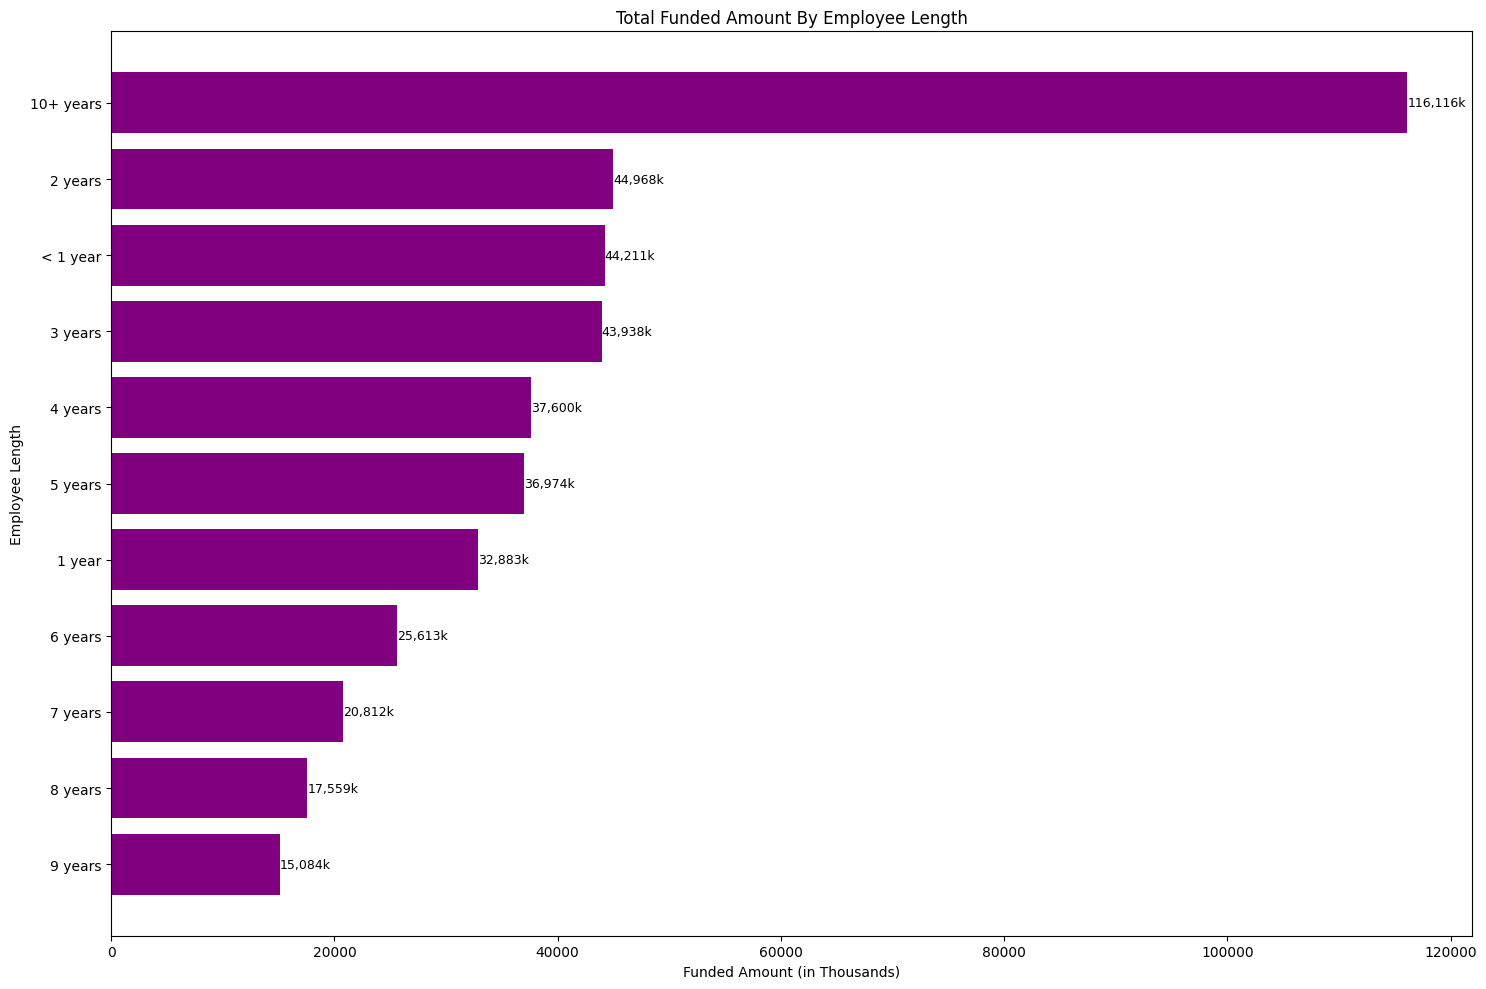

In [37]:
emp_funding = data.groupby('emp_length')['loan_amount'].sum().sort_values()/1000


plt.figure(figsize = (15,10))
bars = plt.barh(emp_funding.index, emp_funding.values, color = 'purple')


for bar in bars:
  width = bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height()/2,
           f"{width:,.0f}k", va='center', fontsize = 9)

plt.title("Total Funded Amount By Employee Length")
plt.xlabel("Funded Amount (in Thousands)")
plt.ylabel("Employee Length")
plt.tight_layout()
plt.show()

Employee Length By Total Amount Recieved

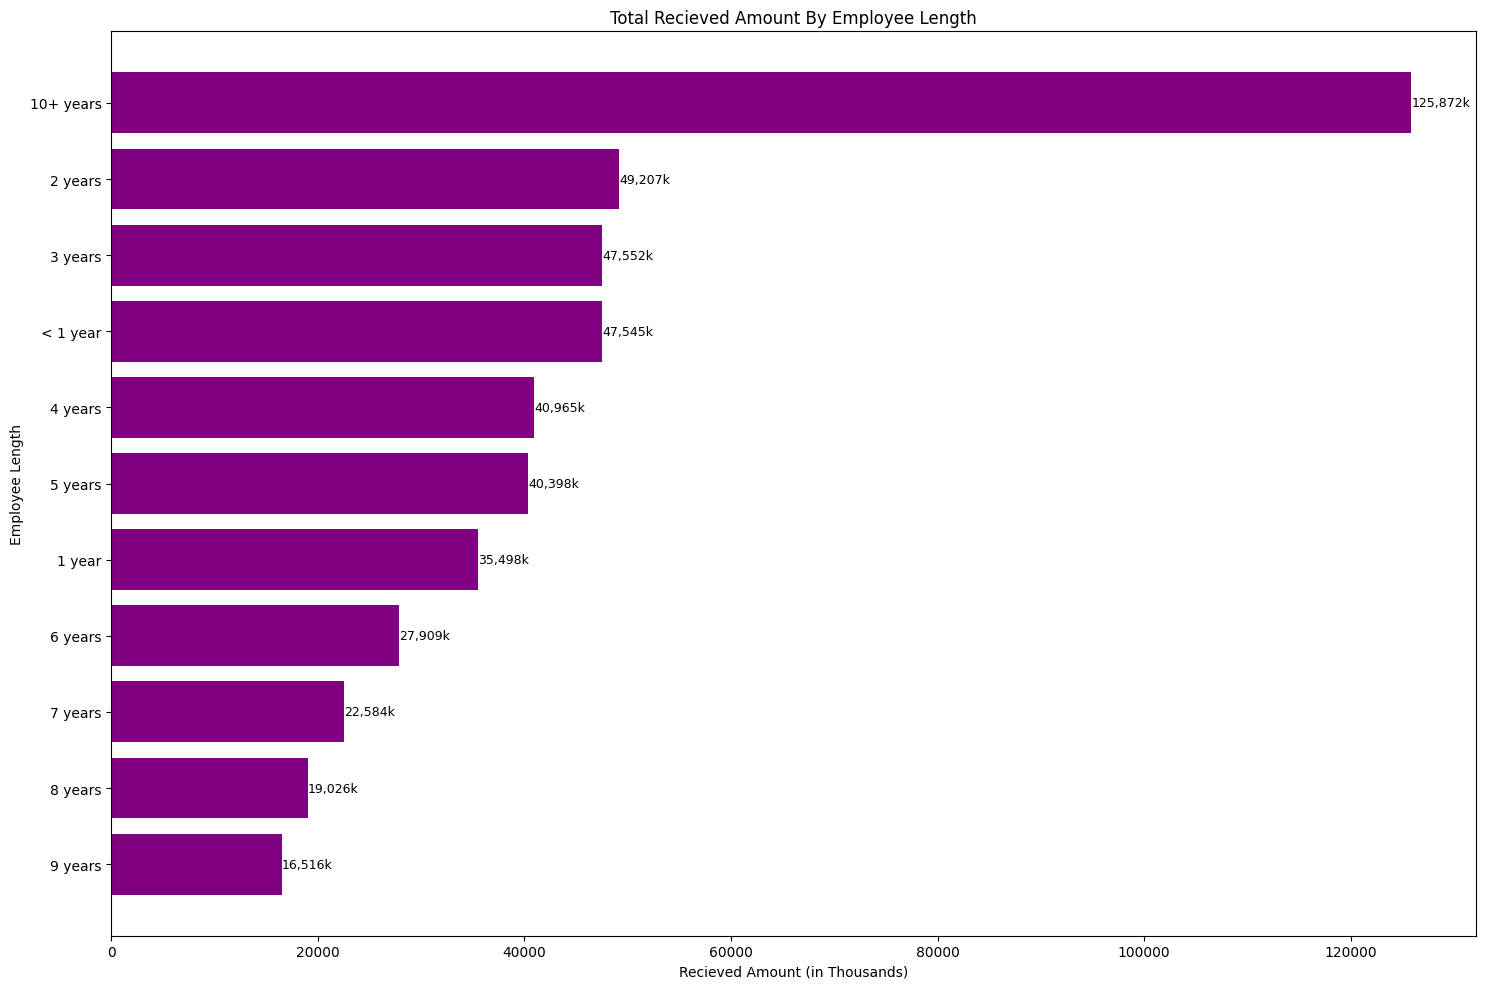

In [39]:
emp_amount_recieved = data.groupby('emp_length')['total_payment'].sum().sort_values()/1000


plt.figure(figsize = (15,10))
bars = plt.barh(emp_amount_recieved.index, emp_amount_recieved.values, color = 'purple')


for bar in bars:
  width = bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height()/2,
           f"{width:,.0f}k", va='center', fontsize = 9)

plt.title("Total Recieved Amount By Employee Length")
plt.xlabel("Recieved Amount (in Thousands)")
plt.ylabel("Employee Length")
plt.tight_layout()
plt.show()

Loan Purpose By Total Funded Amount

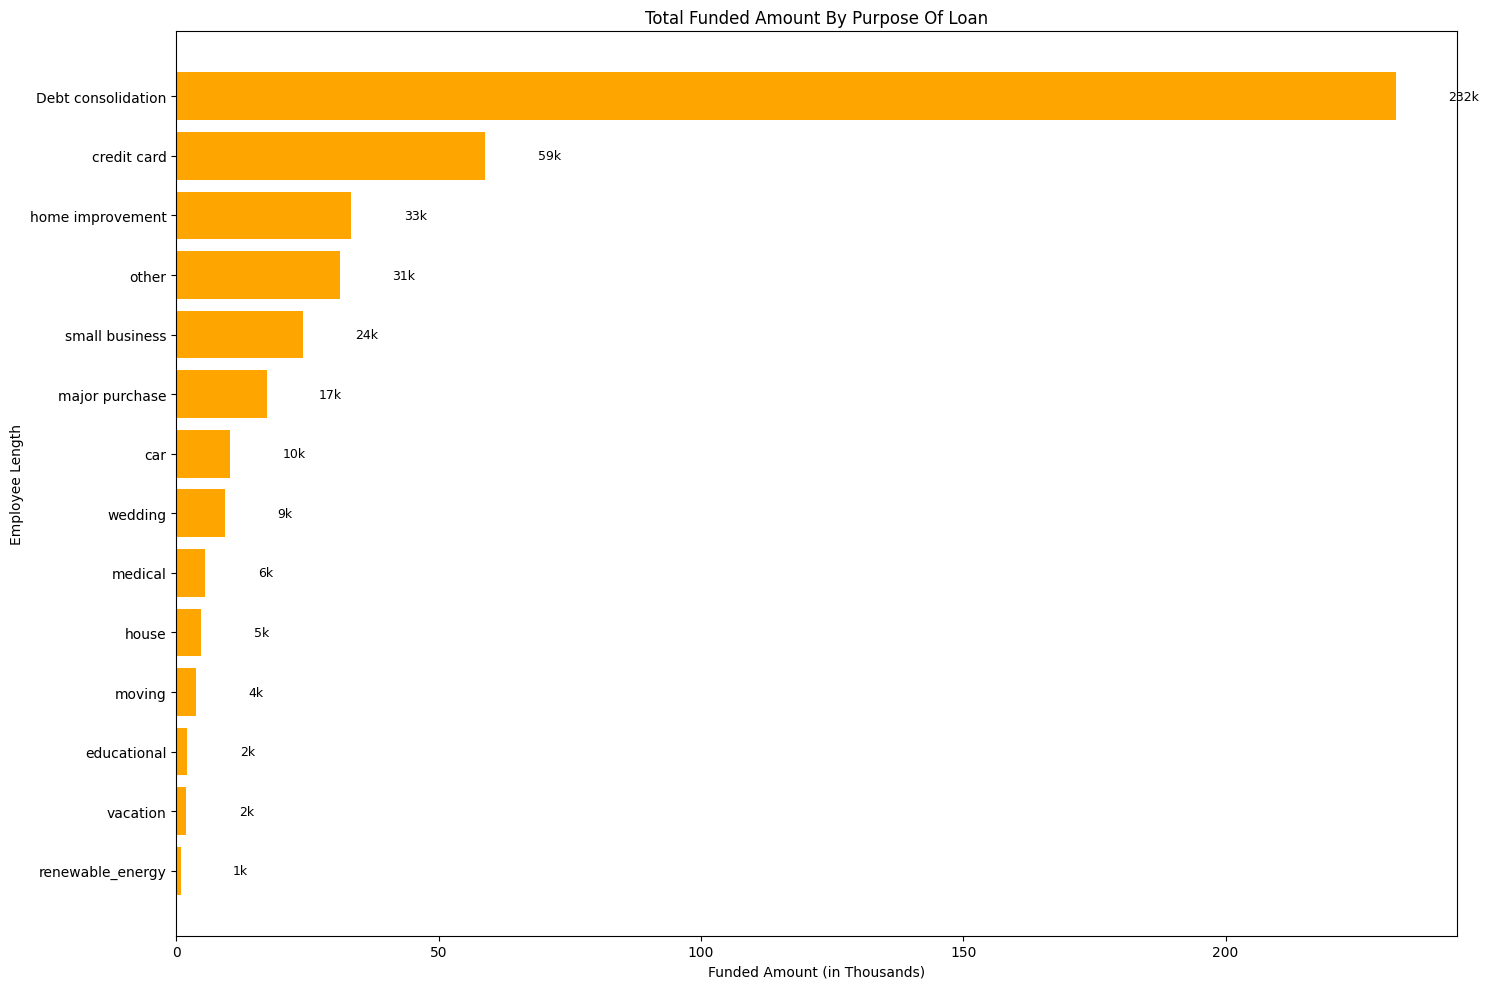

In [42]:
purpose_funding_millions = data.groupby('purpose')['loan_amount'].sum().sort_values()/1000000


plt.figure(figsize = (15,10))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color = 'orange')


for bar in bars:
  width = bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height()/2,
           f"{width:,.0f}k", va='center', fontsize = 9)

plt.title("Total Funded Amount By Purpose Of Loan")
plt.xlabel("Funded Amount (in Thousands)")
plt.ylabel("Employee Length")
plt.tight_layout()
plt.show()

Loan Purpose By Total Amount Recieved

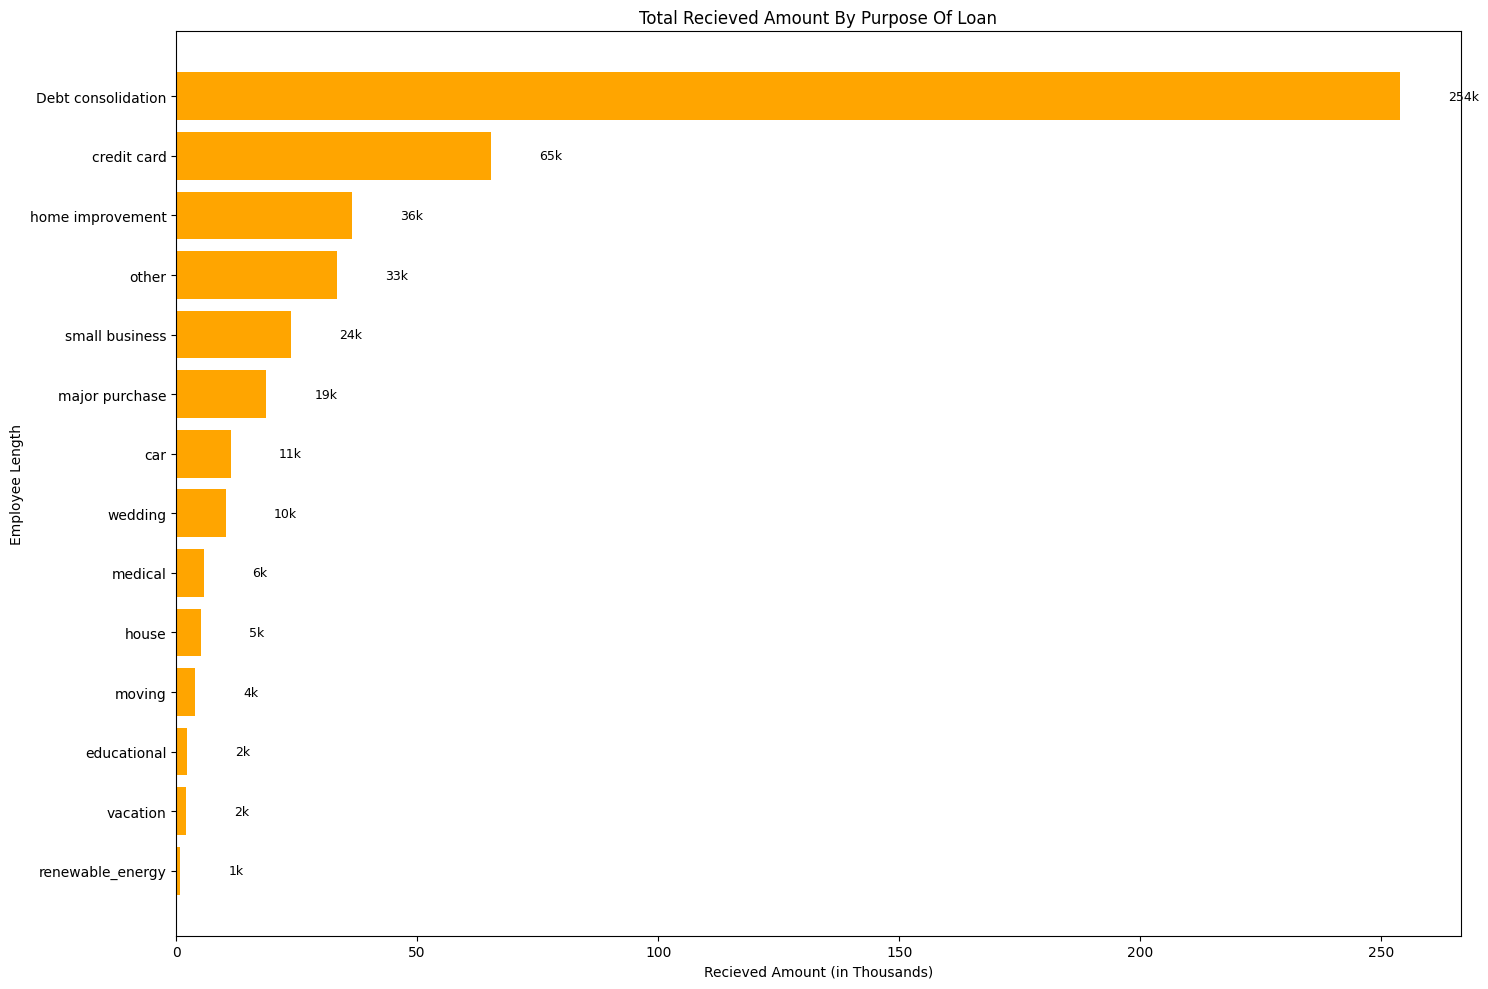

In [43]:
purpose_recieved_millions = data.groupby('purpose')['total_payment'].sum().sort_values()/1000000


plt.figure(figsize = (15,10))
bars = plt.barh(purpose_recieved_millions.index, purpose_recieved_millions.values, color = 'Orange')


for bar in bars:
  width = bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height()/2,
           f"{width:,.0f}k", va='center', fontsize = 9)

plt.title("Total Recieved Amount By Purpose Of Loan")
plt.xlabel("Recieved Amount (in Thousands)")
plt.ylabel("Employee Length")
plt.tight_layout()
plt.show()

Home Ownership By Total Funded Amount

In [44]:
home_funding = data.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding["loan_amount"]/1000000


fig = px.treemap(
    home_funding,
    path=["home_ownership"],
    values = 'loan_amount_millions',
    color = "loan_amount_millions",
    color_continuous_scale = "Blues",
    title = "Total Funded Amount By Home Ownership(in millions)"
)

fig.show()


Home Ownership By Total Recieved Amount

In [48]:
home_recieved_amount = data.groupby('home_ownership')['total_payment'].sum().reset_index()
home_recieved_amount['loan_recieved_amount_millions'] = home_recieved_amount["total_payment"]/1000000


fig = px.treemap(
    home_recieved_amount,
    path=["home_ownership"],
    values = 'loan_recieved_amount_millions',
    color = "loan_recieved_amount_millions",
    color_continuous_scale = "Blues",
    title = "Total Recieved Amount By Home Ownership(in millions)"
)

fig.show()